In [21]:
import pandas as pd

In [22]:
df = pd.read_pickle("./data/resmat.pkl")

In [23]:
results = df.columns

print(type(df.columns))

<class 'pandas.core.indexes.multi.MultiIndex'>


In [24]:
df.columns.names

FrozenList(['input.text', 'scenario', 'benchmark'])

In [25]:

scenario = df.columns.get_level_values('scenario').unique().to_list()
benchmark = df.columns.get_level_values('benchmark').unique().to_list()

scenario_benchmark_combinations = df.columns.to_frame()[['scenario', 'benchmark']].drop_duplicates().values.tolist()

In [26]:
tests = pd.DataFrame(scenario_benchmark_combinations, columns=['scenario', 'benchmark'])
tests

,scenario,benchmark
0,lsat_qa,classic
1,truthful_qa,classic
2,synthetic_reasoning,classic
3,babi_qa,classic
4,wikifact,classic
5,bbq,classic
6,thai_exam,thaiexam
7,dyck_language_np=3,classic
8,legal_support,classic
9,civil_comments,classic


In [27]:
scenario

['lsat_qa',
 'truthful_qa',
 'synthetic_reasoning',
 'babi_qa',
 'wikifact',
 'bbq',
 'thai_exam',
 'dyck_language_np=3',
 'legal_support',
 'civil_comments',
 'legalbench',
 'raft',
 'air_bench_2024',
 'math',
 'med_qa',
 'gsm',
 'boolq',
 'mmlu',
 'entity_matching',
 'entity_data_imputation',
 'commonsense',
 'imdb']

In [28]:
df.shape

(183, 78712)

In [29]:
# Aggregate correct/incorrect responses for each test-taker (row) across all scenarios
num_test_takers = df.shape[0]
num_questions = df.shape[1]

correct_counts = []
incorrect_counts = []

for i in range(num_test_takers):
    row = df.iloc[i]
    correct = (row == 1).sum()
    incorrect = (row == 0).sum()
    correct_counts.append(correct)
    incorrect_counts.append(incorrect)

agg_df = pd.DataFrame({
    'test_taker': range(num_test_takers),
    'correct': correct_counts,
    'incorrect': incorrect_counts
})
agg_df.head()

,test_taker,correct,incorrect
0,0,9576,42614
1,1,107,450
2,2,867,2594
3,3,4578,13571
4,4,14489,37701


In [30]:
# Calculate scenario_prob = correct / total for each scenario and test-taker
# First, fill missing values with 0 (false)
df_filled = df.fillna(0)

scenario_names = df_filled.columns.get_level_values('scenario').unique()
scenario_probs = pd.DataFrame(index=df_filled.index, columns=scenario_names)

for scenario in scenario_names:
    scenario_cols = df_filled.loc[:, df_filled.columns.get_level_values('scenario') == scenario]
    correct = (scenario_cols == 1).sum(axis=1)
    total = scenario_cols.shape[1]
    scenario_probs[scenario] = correct / total


In [31]:
scenario_probs

scenario,lsat_qa,truthful_qa,synthetic_reasoning,babi_qa,wikifact,bbq,thai_exam,dyck_language_np=3,legal_support,civil_comments,...,air_bench_2024,math,med_qa,gsm,boolq,mmlu,entity_matching,entity_data_imputation,commonsense,imdb
request.model,,,,,,,,,,,,,,,,,,,,,
together/t0pp,0.213656,0.386123,0.0000,0.000000,0.011613,0.495495,0.000000,0.016,0.612795,0.255041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002532,0.000000,0.025779
aisingapore/sea-lion-7b-instruct,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.192101,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
eleutherai/pythia-1b-v0,0.000000,0.000000,0.0000,0.250506,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
allenai/olmo-7b,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.036697,0.215431,0.044132,0.000000,0.258791,0.000000,0.000000,0.220884,0.000000
together/opt-66b,0.189427,0.207097,0.2359,0.296157,0.256215,0.381381,0.000000,0.436,0.496633,0.170606,...,0.000000,0.000000,0.000000,0.000000,0.754524,0.000000,0.743553,0.754430,0.000000,0.173654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
openai/o1-2024-12-17,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.827482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
anthropic/claude-3-opus-20240229,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.673250,0.000,0.000000,0.000000,...,0.870612,0.791284,0.777555,0.926780,0.000000,0.849807,0.000000,0.000000,0.955823,0.000000
anthropic/claude-3-5-sonnet-20240620,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.739677,0.000,0.000000,0.000000,...,0.885456,0.827982,0.832665,0.951856,0.000000,0.872344,0.000000,0.000000,0.971888,0.000000


In [32]:
scenario_probs.to_csv("./data/scenario_probs.csv", index=False)

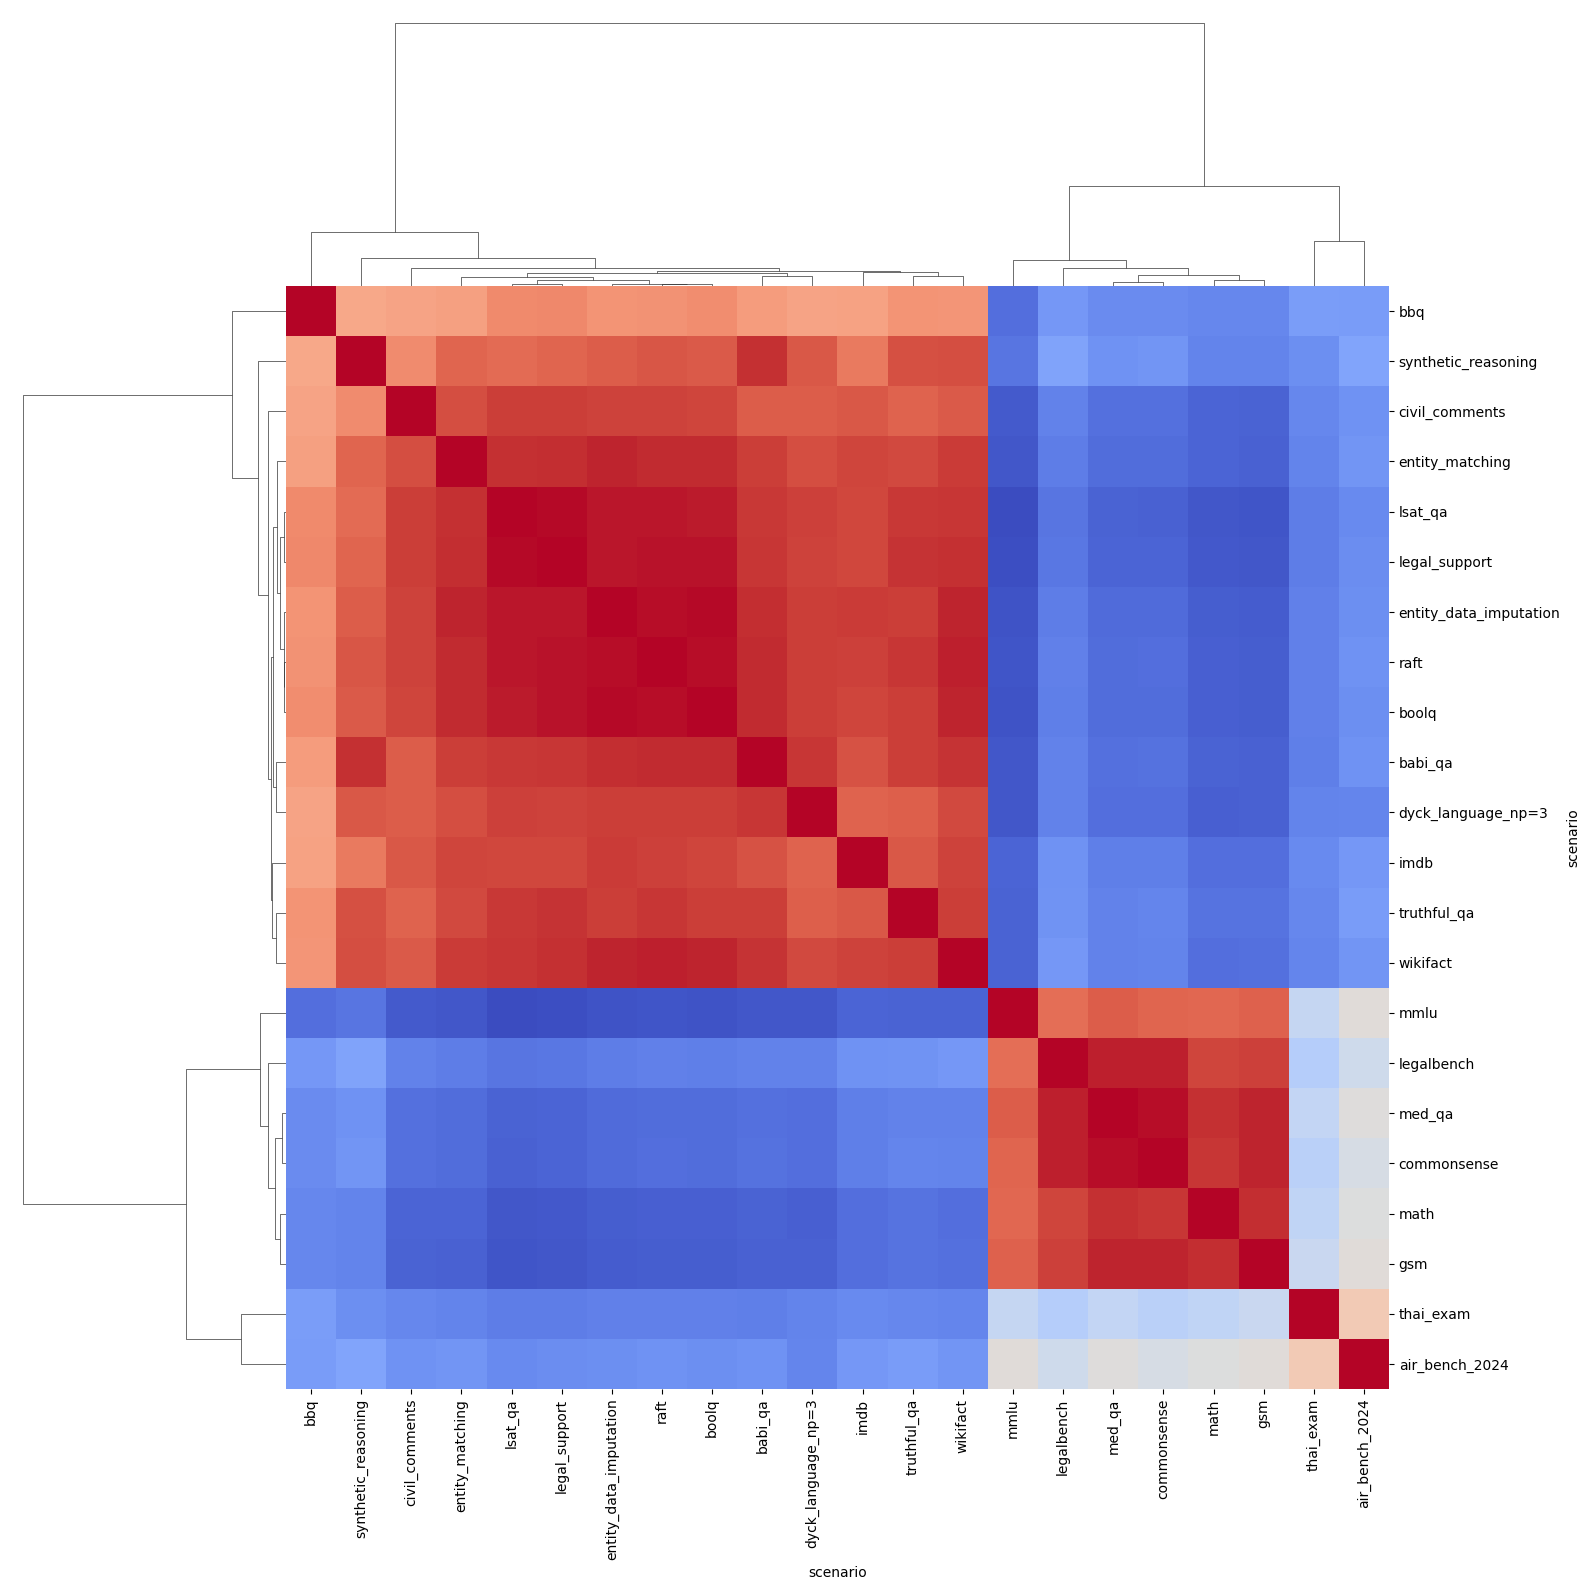

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Calculate the 22x22 correlation matrix (this stays the same)
dataset_correlation_matrix = scenario_probs.corr()

# 2. Use clustermap to automatically reorder and plot the heatmap
# This one function handles the clustering and plotting together.
sns.clustermap(
    dataset_correlation_matrix, 
    cmap='coolwarm', 
    figsize=(16, 16),
    annot=False, # Annotation might be cluttered, but can be useful
    fmt='.2f',
    cbar_pos=None # Disables the colorbar legend
)
plt.savefig('./result/resmat_corr_scenario.svg')

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'scenario_probs' is your original DataFrame.
# The preprocessing steps remain the same.
scenario_probs_filled = scenario_probs.fillna(scenario_probs.mean())

# 1. Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scenario_probs_filled)


## 2. Apply PCA with n_components=7
# Here's the key change: we specify we want to keep 7 components.
pca = PCA(n_components=7)
principal_components = pca.fit_transform(scaled_data)


## 3. Create a DataFrame with the 7 Principal Components
# This new DataFrame now holds your data in the reduced 7-dimensional space.
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
pca_df_7_components = pd.DataFrame(
    data=principal_components,
    columns=pca_columns,
    index=scenario_probs_filled.index
)

# You can also verify the total variance explained by these 7 components
explained_variance_total = np.sum(pca.explained_variance_ratio_)
print(f"\nTotal variance explained by 7 components: {explained_variance_total:.2%}")
pca_df_7_components


Total variance explained by 7 components: 95.36%


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
request.model,,,,,,,
together/t0pp,1.336106,-1.869441,-0.853967,1.233806,2.299510,-0.467186,0.233932
aisingapore/sea-lion-7b-instruct,-1.449267,-3.076638,-0.559044,0.270712,-0.250239,0.237915,-0.248076
eleutherai/pythia-1b-v0,-0.978570,-2.776566,-1.090700,-0.421546,0.006609,0.733119,-0.283996
allenai/olmo-7b,-1.916086,-1.648831,-1.158166,-0.234643,0.012616,0.214112,-0.104913
together/opt-66b,4.046656,-0.632356,-0.274604,0.420980,0.775506,0.502997,0.409407
...,...,...,...,...,...,...,...
openai/o1-2024-12-17,-1.653493,-2.975011,1.169992,-1.905540,1.436664,0.147299,-0.487160
anthropic/claude-3-opus-20240229,-4.313495,1.583793,3.585608,0.456703,-0.076012,-0.353738,0.320184
anthropic/claude-3-5-sonnet-20240620,-4.439253,1.733417,3.846359,0.651092,-0.193648,-0.382078,0.336564


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This assumes you have already run the PCA with 7 components
# and have the 'pca' object and 'scenario_probs_filled' DataFrame.

# 1. Create a DataFrame for the loadings
loadings_df = pd.DataFrame(
    pca.components_.T, # Transpose the components matrix
    columns=[f'PC{i+1}' for i in range(7)], # Name the columns PC1 to PC7
    index=scenario_probs_filled.columns # Use original scenario names as the index
)

In [36]:
# Loop through each of the 7 principal component columns
for i in range(1, 8):
	pc_name = f'PC{i}'
	
	# Sorted descending for strongest positive influence
	sorted_desc = loadings_df.sort_values(by=pc_name, ascending=False)
	# Sorted ascending for strongest negative influence (smallest to largest)
	sorted_asc = loadings_df.sort_values(by=pc_name, ascending=True)
	
	print(f"--- Interpretation for {pc_name} ---")
	print("POSITIVE:")
	print(sorted_desc[pc_name].head(5))
	print("\nNEGATIVE:")
	print(sorted_asc[pc_name].head(5))
	print("-" * 40 + "\n")


--- Interpretation for PC1 ---
POSITIVE:
scenario
legal_support             0.256375
raft                      0.255598
entity_data_imputation    0.255534
lsat_qa                   0.255500
boolq                     0.255016
Name: PC1, dtype: float64

NEGATIVE:
scenario
mmlu          -0.180436
gsm           -0.177631
math          -0.175177
med_qa        -0.166305
commonsense   -0.164443
Name: PC1, dtype: float64
----------------------------------------

--- Interpretation for PC2 ---
POSITIVE:
scenario
legalbench     0.408842
commonsense    0.396339
med_qa         0.394719
gsm            0.362476
math           0.357033
Name: PC2, dtype: float64

NEGATIVE:
scenario
thai_exam        -0.140508
air_bench_2024   -0.010238
bbq               0.059187
civil_comments    0.078529
lsat_qa           0.081923
Name: PC2, dtype: float64
----------------------------------------

--- Interpretation for PC3 ---
POSITIVE:
scenario
air_bench_2024         0.741009
thai_exam              0.637157
syntheti

### Final Principal Component Interpretations

Here is a concise, clear summary for all 7 principal components, outlining the descriptive name and the meaning of positive vs. negative scores for each.

---

#### **PC1: Foundational vs. Expert Reasoning**
This component captures the primary trade-off between basic retrieval and complex problem-solving. It's the most significant axis of variation in model performance.

* **Positive Pole:** A high score indicates strength in **foundational skills** like instruction following, retrieval, and single-step QA (`legal_support`, `raft`, `boolq`).
* **Negative Pole:** A high negative score indicates strength in **expert-level reasoning** requiring deep domain knowledge and multi-step logic (`mmlu`, `math`, `med_qa`).

---

#### **PC2: General Academic Aptitude**
This component measures broad capability across a range of difficult, knowledge-intensive benchmarks.

* **Positive Pole:** A high score indicates strong performance in **general academic and quantitative reasoning** (`legalbench`, `commonsense`, `gsm`).
* **Negative Pole:** Indicates a comparative lack of this broad academic skill, as there are no strong opposing scenarios.

---

#### **PC3: Thai-Specific Proficiency**
This component isolates a model's specialized knowledge for benchmarks in the Thai language.

* **Positive Pole:** A high score indicates strong proficiency in **Thai-language tasks** (`air_bench_2024`, `thai_exam`).
* **Negative Pole:** Indicates a lack of this specific regional knowledge.

---

#### **PC4: Thai Benchmark Conflict**
This component highlights a direct conflict between the two Thai-language benchmarks.

* **Positive Pole:** A high score indicates stronger performance on **`thai_exam`**.
* **Negative Pole:** A high negative score indicates stronger performance on the other Thai benchmark, **`air_bench_2024`**.

---

#### **PC5: Safety vs. Specificity Trade-off**
This component reveals a trade-off between general safety/bias training and specific regional knowledge.

* **Positive Pole:** A high score indicates strong performance on the **`bbq` bias benchmark**.
* **Negative Pole:** A high negative score indicates strong performance on the **`thai_exam`**.

---

#### **PC6: Abstract vs. Applied Language Reasoning**
This component distinguishes between symbolic reasoning and understanding human context.

* **Positive Pole:** A high score indicates strength in **abstract and symbolic reasoning** (`synthetic_reasoning`, `babi_qa`).
* **Negative Pole:** A high negative score indicates strength in understanding **nuanced, real-world human language** (`civil_comments`, `imdb`).

---

#### **PC7: MMLU Specialization**
This component isolates a model's specialized optimization for a single, popular benchmark.

* **Positive Pole:** A high score indicates exceptionally strong, specialized performance on the **`mmlu` benchmark**.
* **Negative Pole:** A high negative score indicates stronger relative performance on other expert benchmarks (`legalbench`, `commonsense`) compared to `mmlu`.

# Selecting questions for master exam

Choosing loads >= |0.4| (needs more testing and theoretical proof)

In [37]:
import pandas as pd

In [38]:
# Select scenarios with absolute loadings >= 0.4 for each principal component
threshold = 0.4
selected_scenarios_by_pc = {}

for pc in sorted_asc.columns:
	mask = sorted_asc[pc].abs() >= threshold
	selected_scenarios_by_pc[pc] = sorted_asc.index[mask].tolist()

selected_scenarios_by_pc

{'PC1': [],
 'PC2': ['legalbench'],
 'PC3': ['air_bench_2024', 'thai_exam'],
 'PC4': ['air_bench_2024', 'thai_exam', 'bbq'],
 'PC5': ['air_bench_2024', 'thai_exam', 'bbq'],
 'PC6': ['civil_comments', 'synthetic_reasoning'],
 'PC7': ['mmlu']}

In [39]:
# Expand the FrozenList to include a_params for each column
import pandas as pd
from pandas import read_pickle
from pandas.core.indexes.frozen import FrozenList

# Load a_params (shape: (78712,))
a_params = pd.read_csv('./data/unidimensional/a_params.csv', header=None).squeeze()
d_params = pd.read_csv('./data/unidimensional/d_params.csv', header=None).squeeze()

# Load df and its columns (already done above, but shown for clarity)
# df = pd.read_pickle('data/resmat.pkl')
columns = df.columns

# Existing FrozenList: ['input.text', 'scenario', 'benchmark']
old_frozen = df.columns

# Expand to include a_params for each column
expanded_frozen = FrozenList(list(old_frozen.names) + ['a_params'] + ['d_params'])

# To attach a_params to the columns, you can create a MultiIndex with an extra level
new_arrays = list(df.columns.to_frame(index=False).values.T) + [a_params.values] + [d_params.values]
new_index = pd.MultiIndex.from_arrays(new_arrays, names=list(expanded_frozen))

# Assign new MultiIndex to df
df.columns = new_index

# Check the new columns structure
df.columns.names

FrozenList(['input.text', 'scenario', 'benchmark', 'a_params', 'd_params'])

In [40]:
import pandas as pd
import numpy as np

# Assume 'df' is your original (183, 78712) DataFrame with the MultiIndex on its columns.

# ---------------------------------------------------------------------------------
# <<< Step 1: Create a Clean "Item Master List" with Missing Counts >>>
print("--- Creating Item Master List from Column MultiIndex ---")

# <<< Calculate the number of missing (NaN) values for each item (column) >>>
missing_counts = df.isnull().sum()

item_master_df = pd.DataFrame({
    'item_id': range(df.shape[1]),
    'scenario': df.columns.get_level_values('scenario'),
    'a_params': df.columns.get_level_values('a_params').astype(float),
    'missing_count': missing_counts.values # <<< Add the new missing count column >>>
})

print("Successfully created Item Master List. First 5 rows:")
print(item_master_df.head())
# ---------------------------------------------------------------------------------


# 2. The New, More Robust Selection Function
def select_balanced_items(item_df, anchor_datasets, total_k, min_per_scenario=10):
    """
    Selects items by prioritizing low missing values and high discrimination,
    while ensuring a minimum number of items from each anchor scenario.
    """
    guaranteed_items = pd.DataFrame()

    # First, guarantee the minimum number of items from each scenario
    for scenario in anchor_datasets:
        scenario_pool = item_df[item_df['scenario'] == scenario]
        # Sort by least missing, then highest discrimination
        ranked_scenario_pool = scenario_pool.sort_values(
            by=['missing_count', 'a_params'], 
            ascending=[True, False]
        )
        guaranteed_items = pd.concat([guaranteed_items, ranked_scenario_pool.head(min_per_scenario)])
    
    guaranteed_items = guaranteed_items.drop_duplicates(subset=['item_id'])
    
    # Second, fill the remaining spots with the best overall items available
    num_guaranteed = len(guaranteed_items)
    remaining_k = total_k - num_guaranteed
    
    if remaining_k > 0:
        full_pool = item_df[item_df['scenario'].isin(anchor_datasets)]
        eligible_pool = full_pool[~full_pool['item_id'].isin(guaranteed_items['item_id'])]
        ranked_eligible_pool = eligible_pool.sort_values(
            by=['missing_count', 'a_params'], 
            ascending=[True, False]
        )
        remaining_items = ranked_eligible_pool.head(remaining_k)
        final_selection = pd.concat([guaranteed_items, remaining_items])
    else:
        # If guaranteeing items gives us more than we need, trim down to the best
        final_selection = guaranteed_items.sort_values(
            by=['missing_count', 'a_params'], 
            ascending=[True, False]
        ).head(total_k)

    return final_selection


# 3. Define Your Test Blueprint
k_unipolar = 20
k_bipolar_pole = 10
min_per_scenario = 10 # <<< New constraint >>>

# ... (dataset definitions for PC2 through PC7 remain the same) ...
pc2_datasets = ['legalbench']
pc3_datasets = ['air_bench_2024', 'thai_exam']
pc4_pos_datasets = ['thai_exam', 'bbq']
pc4_neg_datasets = ['air_bench_2024']
pc5_pos_datasets = ['bbq', 'air_bench_2024']
pc5_neg_datasets = ['thai_exam']
pc6_pos_datasets = ['synthetic_reasoning']
pc6_neg_datasets = ['civil_comments']
pc7_datasets = ['mmlu']

# 4. Select Items for Each Component (using the new function)
print("\n--- Selecting Items for MASTER TEST with new constraints ---")
# <<< The calls are now updated to use the new function and constraints >>>
pc2_items = select_balanced_items(item_master_df, pc2_datasets, k_unipolar, min_per_scenario)
pc2_items['component'] = 'PC2_General_Aptitude'

pc3_items = select_balanced_items(item_master_df, pc3_datasets, k_unipolar, min_per_scenario)
pc3_items['component'] = 'PC3_Thai_Proficiency'

pc4_pos_items = select_balanced_items(item_master_df, pc4_pos_datasets, k_bipolar_pole, min_per_scenario)
pc4_neg_items = select_balanced_items(item_master_df, pc4_neg_datasets, k_bipolar_pole, min_per_scenario)
pc4_items = pd.concat([pc4_pos_items, pc4_neg_items])
pc4_items['component'] = 'PC4_Thai_Conflict'

pc5_pos_items = select_balanced_items(item_master_df, pc5_pos_datasets, k_bipolar_pole, min_per_scenario)
pc5_neg_items = select_balanced_items(item_master_df, pc5_neg_datasets, k_bipolar_pole, min_per_scenario)
pc5_items = pd.concat([pc5_pos_items, pc5_neg_items])
pc5_items['component'] = 'PC5_Safety_vs_Specificity'

pc6_pos_items = select_balanced_items(item_master_df, pc6_pos_datasets, k_bipolar_pole, min_per_scenario)
pc6_neg_items = select_balanced_items(item_master_df, pc6_neg_datasets, k_bipolar_pole, min_per_scenario)
pc6_items = pd.concat([pc6_pos_items, pc6_neg_items])
pc6_items['component'] = 'PC6_Abstract_vs_Applied'

pc7_items = select_balanced_items(item_master_df, pc7_datasets, k_unipolar, min_per_scenario)
pc7_items['component'] = 'PC7_MMLU_Specialization'


# 5. Assemble the Final MASTER TEST
master_test_df = pd.concat([
    pc2_items,
    pc3_items,
    pc4_items,
    pc5_items,
    pc6_items,
    pc7_items
])

print("\n--- Final Test Assembly ---")
print(f"Total items in MASTER TEST: {len(master_test_df)}")

# --- Create the final data matrix and fill missing values ---
selected_item_indices = master_test_df['item_id'].tolist()
final_test_data_matrix = df.iloc[:, selected_item_indices]

# <<< Fill any remaining NaN values with 0 (representing an incorrect answer) >>>
master_test_df.to_csv('./data/master_test_metadata.csv', index=False)
final_test_data_matrix.to_pickle('./data/master_test_data_matrix.pkl')
print(f"\nShape of the new test data matrix: {final_test_data_matrix.shape}")
print(f"Missing values in final matrix: {final_test_data_matrix.isnull().sum().sum()}")

--- Creating Item Master List from Column MultiIndex ---
Successfully created Item Master List. First 5 rows:
   item_id scenario  a_params  missing_count
0        0  lsat_qa -0.018817            114
1        1  lsat_qa  0.045839            114
2        2  lsat_qa -0.020588            114
3        3  lsat_qa -0.018545            114
4        4  lsat_qa -0.037079            114

--- Selecting Items for MASTER TEST with new constraints ---

--- Final Test Assembly ---
Total items in MASTER TEST: 120

Shape of the new test data matrix: (183, 120)
Missing values in final matrix: 14740
